# Bayesian Approaches: Exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1.** Apply Bayesian linear regression with gaussian basis functions to a data sampled from a nonlionear function of your interest and see how $\alpha$, $\beta$, $M$ and $N$ affect the performance.

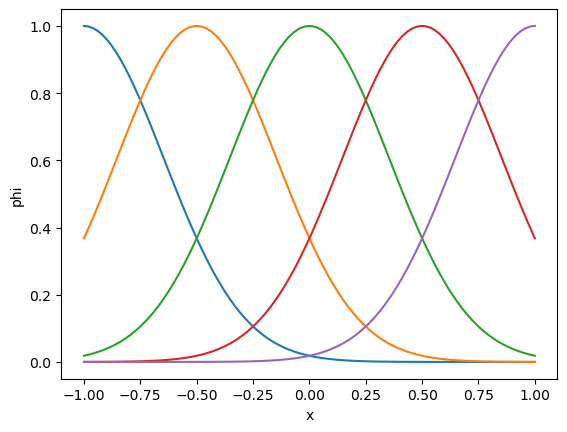

In [2]:
# 1D Gaussian basis functions 
def gbf1(x, xrange=[-1.,1.], M=10):
    """Gaussian basis functions: x can be a 1D array"""
    xc = np.linspace(xrange[0], xrange[1], num=M)  # centers
    xd = (xc[1]-xc[0])  # interval
    # x can be an array for N data points
    return np.exp(-((np.tile(x,[M,1]).T - xc)/xd)**2)
# example
x = np.linspace(-1, 1, 100)
plt.plot(x, gbf1(x, M=5));
plt.xlabel("x"); plt.ylabel("phi");
plt.show()

In [3]:
def blr(X, t, alpha=1., beta=10.):
    """Bayesian linear regression
    alpha: inv. variance of weight prior 
    beta: inv. variance of observation noise
    """
    N, D = X.shape
    S = np.linalg.inv(alpha*np.eye(D) + beta*X.T@X) # posterior covariance
    m = beta*S@X.T@t   # posterior mean
    return m, S

def target(x):
    """Target function"""
    #return np.sin(x)
    #return np.tanh(x)
    #return 1 / (1 + np.exp(-x))
    return 0.5 * np.sin(2*x) + 0.3 * np.cos(3*x)

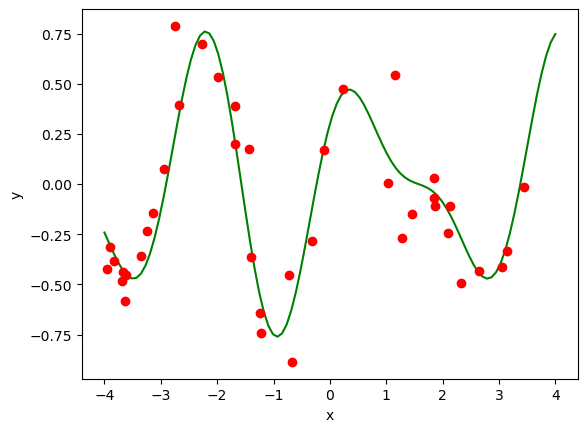

In [4]:
# Training data
N = 40
eps = 0.2  # noise size
xr = 4   # range of x
x = np.random.uniform(-xr, xr, size=N)  
f = target(x)  # target function
t = f + np.random.normal(scale=eps, size=N) # with noise
# data for testing/plotting
Np = 100
xp = np.linspace(-xr, xr, Np)
fp = target(xp)
plt.plot(xp, fp, "g")  # target function
plt.plot(x, t, "ro");  # training data
plt.xlabel("x"); plt.ylabel("y");
plt.show()

[-0.09407371 -0.57097771  0.42130315  0.35966442  0.48093918 -0.72007035
 -0.39826543  0.21919223  0.510379   -0.12311008  0.03454974 -0.14775578
 -0.46887698  0.06743875  0.15719964]


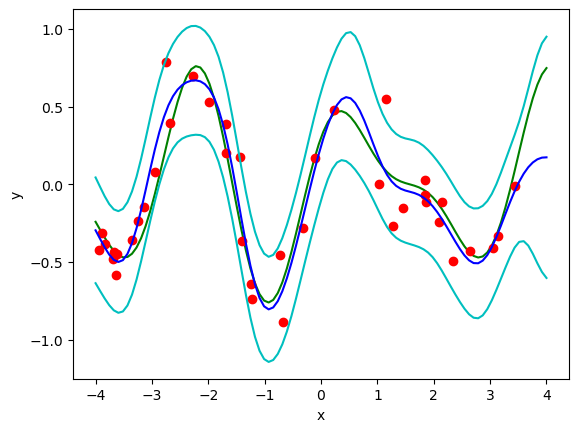

In [5]:
alpha = 1.  # inverse variance of weight prior
beta = 10  # inverse variance of observation noise
M = 15  # number of basis functions
Phi = gbf1(x, [-xr,xr], M)  # Gaussian basis functions
m, S = blr(Phi, t, alpha=1, beta=25)  # Bayesian linear regression
print(m)
# test data
Phip = gbf1(xp, [-xr,xr], M)
yp = Phip@m.T
plt.plot(xp, fp, "g")  # target function
plt.plot(x, t, "ro");  # training data
plt.plot(xp, yp, "b");  # MAP estimate
# predictive distribution
sigma = np.sqrt(1/beta + np.sum(Phip@S*Phip, axis=1))
plt.plot(xp, yp+sigma, "c")
plt.plot(xp, yp-sigma, "c")
plt.xlabel("x"); plt.ylabel("y");
plt.show()

**2.** Compute the log evidence for the above models and see how that is related to the prediction errors.

In [6]:
def logev(X, t, m, S):
    """log evidence for Bayesian regression
    m: posterior mean
    S: posterior covariance
    alpha: inv. variance of weight prior 
    beta: inv. variance of observation noise
    """
    N, D = X.shape
    #S = np.linalg.inv(alpha*np.eye(D) + beta*X.T@X) # posterior covariance
    #m = beta*S@X.T@t   # posterior mean
    em = t - X@m.T  # error with MAP estimate
    alpha = D/np.dot(m,m)
    beta = N/np.dot(em,em)
    # log evidence
    lev = -beta/2*np.dot(em,em) - alpha/2*np.dot(m,m) + np.log(abs(np.linalg.det(S)))/2 + D/2*np.log(alpha) + N/2*(np.log(beta/(2*np.pi)))
    return lev, alpha, beta

2 131.6854071370867 6.337947756761874 -21.668057050514268 0.18618808425764855
3 8.543155121075028 6.679679725886381 -24.925679965503452 0.194716182244525
4 26.5784652352042 6.672834349974837 -24.141369855990533 0.18805099483313584
5 2.4732290756021973 7.86873762046957 -27.502330581420363 0.2252082107959636
6 0.8613435421557443 17.098074825940667 -16.913997365378457 0.06666195953482677
7 1.871340400928214 15.467832836809016 -18.512151042186595 0.07425012671094863
8 2.280234467991402 19.061625990386162 -15.215794564547046 0.07465873195257479
9 1.6893751410738462 36.57753567730183 -5.236287583015205 0.01610900452268281
10 2.3532139802156506 36.16699361282822 -5.447696894052925 0.013753188358156688
11 3.4584689881764787 39.06828756194356 -3.245162479811434 0.012162411637445952
12 4.624462796772225 40.8838931425531 -1.925792726849778 0.01503064094020818
13 5.69561352455518 41.5727218925417 -1.2061597924672824 0.018222171882568635
14 6.298160608000276 43.29606289131503 -0.6265751457818709 0.

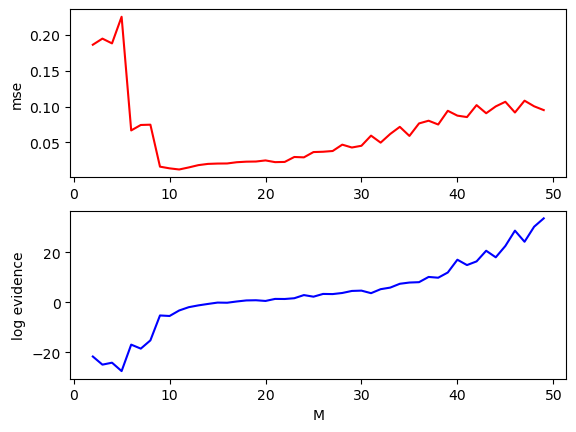

In [7]:
# try different values of M
Max = 50  # max number of basis functions
mse = np.zeros(Max)  # mean square errors
lev = np.zeros(Max)  # log evidences
for M in range(2,Max):
    Phi = gbf1(x, [-xr,xr], M)  # Gaussian basis functions
    m, S = blr(Phi, t, alpha=1, beta=25)
    lev[M], alpha, beta = logev(Phi, t, m, S)
    # test data
    Phip = gbf1(xp, [-xr,xr], M)  # Gaussian basis functions
    err = fp - Phip@m.T  # validation error
    mse[M] = np.dot(err,err)/Np
    print(M, alpha, beta, lev[M], mse[M])
plt.subplot(2,1,1)
plt.plot(np.arange(2,Max), mse[2:], "r"); plt.ylabel("mse");
plt.subplot(2,1,2)
plt.plot(np.arange(2,Max), lev[2:], "b"); plt.ylabel("log evidence");
plt.xlabel("M");
plt.show()

**3.** Try forward-backward algorithm with different chains and inputs.

In [8]:
class Markov:
    """Class for a Markov chain"""
    
    def __init__(self, ptr):
        """Create a new environment"""
        self.ptr = ptr  # transition matrix p(x'|x)
        self.Ns = len(ptr)  # number of states
        
    def sample(self, x0=0, step=1):
        """generate a sample sequence from x0"""
        seq = np.zeros(step+1, dtype=int) # sequence buffer
        seq[0] = x0
        for t in range(step):
            pt1 = self.ptr[:, seq[t]] # prob. of new states
            seq[t+1] = np.random.choice(self.Ns, p=pt1) # sample 
        return seq
    
    def forward(self, p0, step=1):
        """forward message from initial distribution p0"""
        alpha = np.zeros((step+1, self.Ns)) # priors
        alpha[0] = p0  # initial distribution
        for t in range(step):
            alpha[t+1] = self.ptr @ alpha[t] 
        return alpha

    def backward(self, obs, step=1):
        """backward message from terminal observaion"""
        beta = np.zeros((step+1, self.Ns)) # likelihoods
        beta[-1] = obs  # observation
        for t in range(step, 0, -1): # toward 0
            beta[t-1] = beta[t] @ self.ptr
        return beta
    
    def posterior(self, p0, obs, step):
        """forward-backward algorithm"""
        alpha = self.forward(p0, step)
        beta = self.backward(obs, step)
        post = alpha*beta
        for t in range(step+1):
            post[t] = post[t]/sum(post[t])  # normalize        
        return post

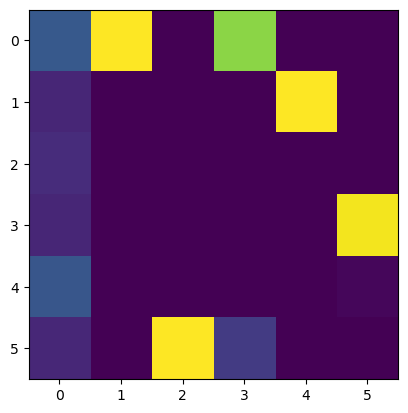

In [21]:
# stochastic cycling on a ring
ns = 6   # ring size
pr = 0.3  # random connection probability
# Create transition matrix with random connections based on probability
Ptr = np.random.rand(ns, ns) < pr  # boolean matrix indicating connections
Ptr = Ptr.astype(float)  # convert to float
# Add small random weights to existing connections
Ptr = Ptr * np.random.rand(ns, ns)
# Ensure each state has at least one outgoing transition
for i in range(ns):
    if np.sum(Ptr[:, i]) == 0:  # if no outgoing connections
        Ptr[np.random.randint(ns), i] = np.random.rand()  # add one random connection
# normalize each column to make it a proper transition matrix
for i in range(ns):
    Ptr[:, i] = Ptr[:, i] / np.sum(Ptr[:, i])
plt.imshow(Ptr)
# create a Markov chain
ring = Markov(Ptr)
plt.show()

In [22]:
# a sample trajectory
T = 15
ring.sample(1, T)

array([1, 0, 5, 3, 0, 4, 1, 0, 0, 0, 5, 3, 0, 5, 3, 5])

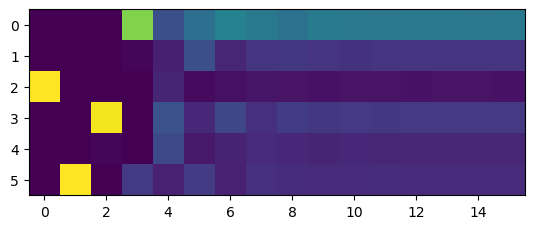

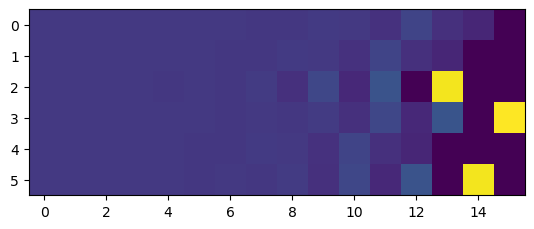

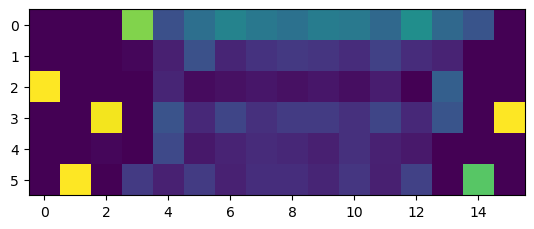

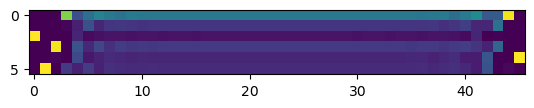

In [23]:
# forward message passing
alpha = ring.forward([0,0,1,0,0,0], T)
plt.imshow(alpha.T);
plt.show()

# backward message passing
beta = ring.backward([0,0,0,1,0,0], T)
plt.imshow(beta.T);
plt.show()

# posterior by their products
post = ring.posterior([0,0,1,0,0,0], [0,0,0,1,0,0], T)
plt.imshow(post.T);
plt.show()

# longer sequence
post = ring.posterior([0,0,1,0,0,0], [0,0,0,0,1,0], 3*T)
plt.imshow(post.T);
plt.show()

**4.** In the above chain example, we assumed that only one of the $K$ bits is one. If we allow simultaneous activation, the number of states increases to $2^K$, such that the conditional probability has $2^{K_n}2^{K_{n+1}}$ parameters.

By using a stochastic neural network,

$$ p(x_{n+1,j}|x_n) = f( \sum_{k=1}^{K_n} w_{jk} x_{nk}) $$

where $f(x)=\frac{1}{1+e^{-x}}$, the conditional probabilty can be defined by $K_nK_{n+1}$ parameters.

Try implementing data sampling and inference in such a chain.